# Finding regression intervals

- sometimes we have noisy data and can't model it using a regressor
- regressors make point predictions: these are the expected values for the target at each value of $x$
- **Bayesian ridge regressor** is capable of returning the expected values as usual, yet it also returns the standard deviation of the target at each value of $x$.
- To demonstrate how this works, let's create a noisy dataset, where $y = x + noise $:

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# x = 150 random integers between 0 and 30
# noise = 150 random numbers using normal distribution --> scale: SD 
data = {'x': np.random.randint(0, 30, size=150),
       'noise': np.random.normal(loc=0.0, scale=5.0, size=150)}

df_noisy = pd.DataFrame(data)
df_noisy.head()

,x,noise
0,21,-2.003239
1,27,-2.232887
2,23,6.222089
3,15,-5.677360
4,25,-4.520745


In [14]:
# Creating the target column using ---> y =  x + noise
df_noisy['y'] = df_noisy['x'] + df_noisy['noise']

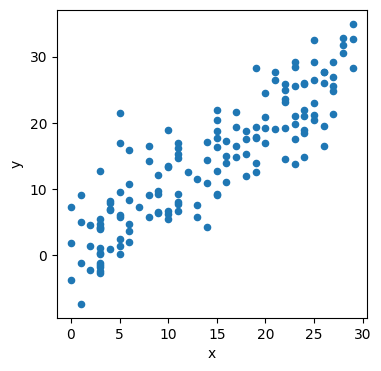

In [15]:
fig, ax = plt.subplots(figsize=(4,4))
df_noisy.plot(kind='scatter', x='x', y='y', ax=ax)
plt.show()

Now, let's train two regressors on the same data
1. LinearRegression
2. BayesianRidge


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

lr = LinearRegression()
br = BayesianRidge()

lr.fit(df_noisy[['x']], df_noisy['y'])
# adding the predicted y from linear regressor to df_noisy
df_noisy['y_lr_pred'] = lr.predict(df_noisy[['x']])

br.fit(df_noisy[['x']], df_noisy['y'])
# adding the predicted y and std deviation from bayesianRidge
df_noisy['y_br_pred'], df_noisy['y_br_std'] = br.predict(
    df_noisy[['x']],return_std=True)


- Similar predictions 
- Bayesian Ridge returns also a standard deviation; we can calculate a range around the values that we expect most of the future data to fall into. 


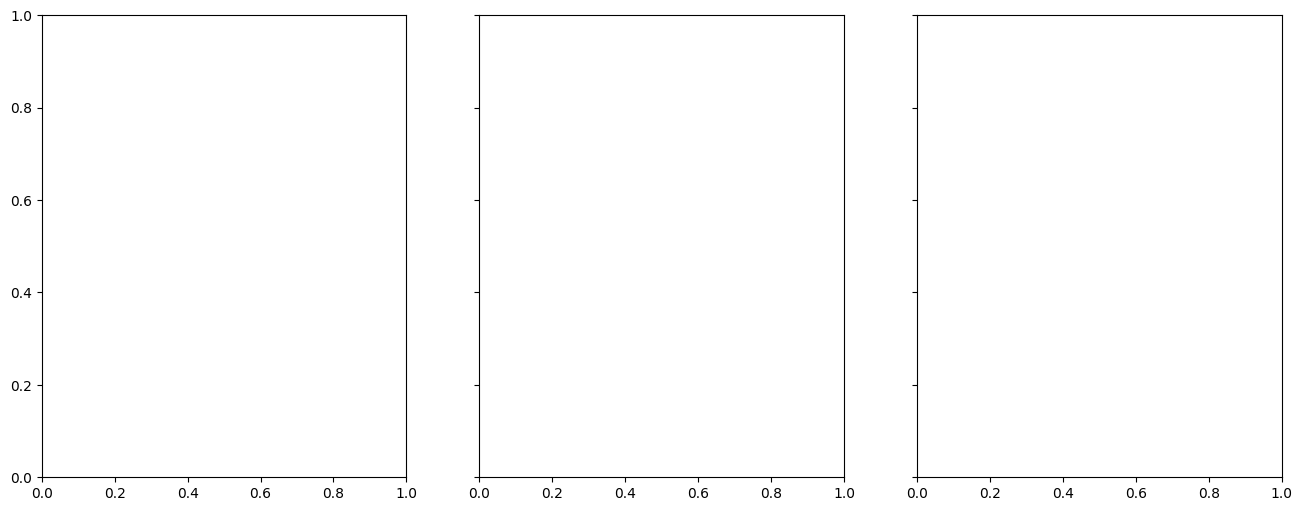

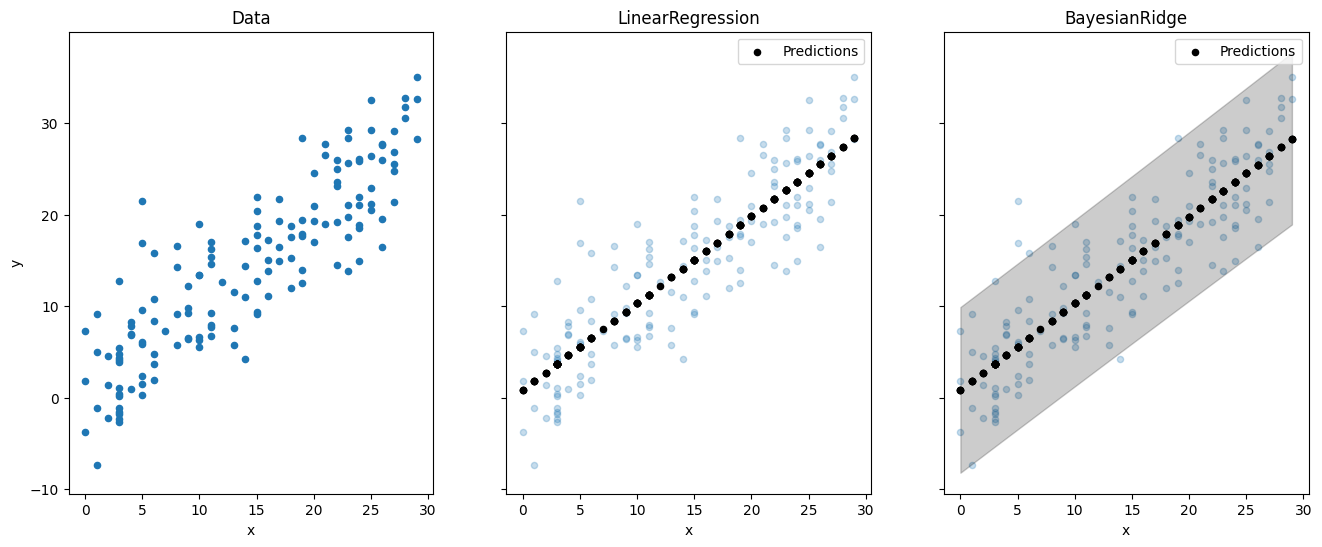

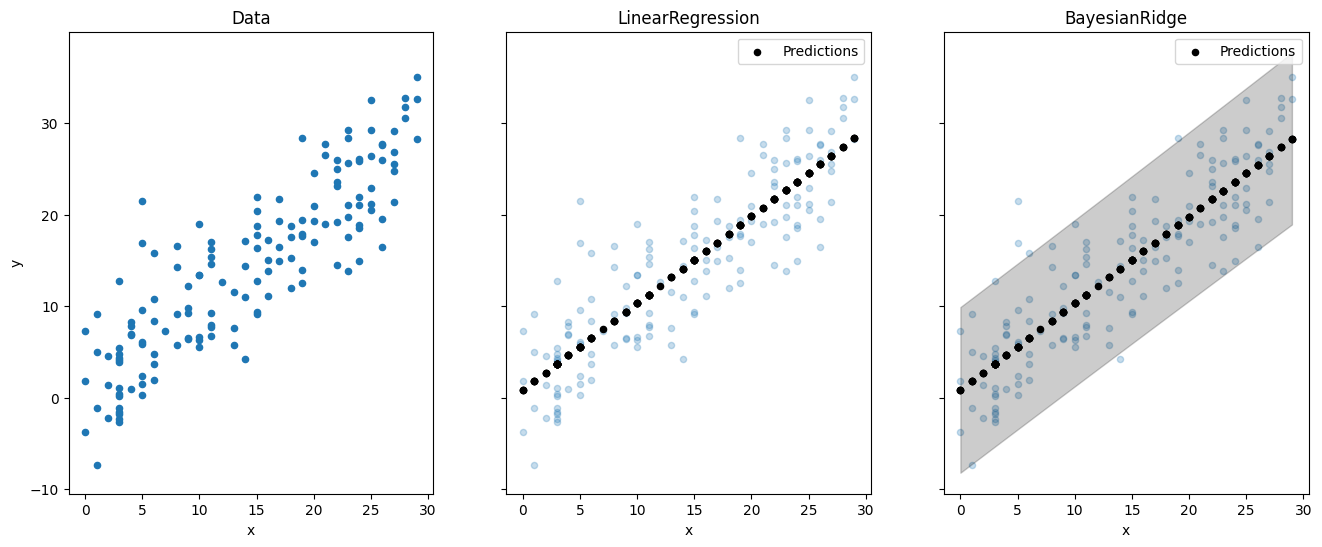

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), 
                       sharex=True, sharey=True)
# We plot the data 3 times
df_noisy.sort_values('x').plot(title='Data', 
                               kind='scatter', x='x', 
                               y='y', ax=axs[0])

df_noisy.sort_values('x').plot(kind='scatter', x='x', 
                               y='y', ax=axs[1], marker='o', 
                               alpha=0.25)

df_noisy.sort_values('x').plot(kind='scatter', x='x', 
                               y='y', ax=axs[2], marker='o', 
                               alpha=0.25)

# Here we plot the Linear Regression predictions
df_noisy.sort_values('x').plot(title='LinearRegression', 
                               kind='scatter', x='x', 
                               y='y_lr_pred', ax=axs[1], 
                               marker='o', color='k', 
                               label='Predictions')

# Here we plot the Bayesian Ridge predictions
df_noisy.sort_values('x').plot(title='BayesianRidge', 
                               kind='scatter', x='x', 
                               y='y_br_pred', ax=axs[2], 
                               marker='o', color='k', 
                               label='Predictions')

# Here we plot the range around the expected values
# We multiply by 1.96 for a 95% Confidence Interval
axs[2].fill_between(df_noisy.sort_values('x')['x'],
                    df_noisy.sort_values('x')['y_br_pred'] - 1.96 * df_noisy.sort_values('x')['y_br_std'],
                    df_noisy.sort_values('x')['y_br_pred'] + 1.96 * df_noisy.sort_values('x')['y_br_std'],
                    color="k", 
                    alpha=0.2, 
                    label="Predictions +/- 1.96 * Std Dev")
plt.show()